In [ ]:
from notebook_utils import cd_parent
cd_parent()

from rdkit import Chem

from chemicalgof import (
    encode,
    decode,
    split
)

from chemicalgof.write import CanonicalGoF2fragSMILES

[INFO] Working directory set to: /home/tox/chemicalgof_repositories/chemicalgof_020


# Encoding fragSMILES for language models

In [2]:
smiles = 'Cc1cc2c(cc1Cc1ccc(C(=O)NC[C@H]3CC[C@H](C(N)=O)CC3)o1)C(C)(C)CCC2(C)C'

Despite molecule involes pseudo chirality (see notebook example 1), capitale chirali labels could be a benefit to train language models

In [7]:
fragsmiles = encode(smiles, capitalize_chirality = True)
fragsmiles

'C.<0>c1ccc2c(c1)CCCC2<1>.<9>(C.).<9>(C.).<6>(C.).<6>(C.).C.<4>c1ccoc1<2>.C=O.N.C.<0R>C1CCCCC1<3R>.C=O.N'

`split` function allows to tokenize on fragment-level the fragsmiles representation into a sequence

In [ ]:
sequence = split(fragsmiles)
sequence

['C',
 '<0>',
 'c1ccc2c(c1)CCCC2',
 '<1>',
 '<9>',
 '(',
 'C',
 ')',
 '<9>',
 '(',
 'C',
 ')',
 '<6>',
 '(',
 'C',
 ')',
 '<6>',
 '(',
 'C',
 ')',
 'C',
 '<4>',
 'c1ccoc1',
 '<2>',
 'C=O',
 'N',
 'C',
 '<0R>',
 'C1CCCCC1',
 '<3R>',
 'C=O',
 'N']

Decoded sequence will convert fragSMLES into correct source SMILES (with pseudochirality)

In [9]:
decoded_smiles = Chem.CanonSmiles(decode(sequence))
assert(decoded_smiles == smiles)

# Decoding a sampled sequence by language model

In [2]:
sampled = ['C', '<0>', 'c1c[nH]nn1', '<2>', 'C', '<3R>', 'C1CCCCC1', '<0S>', 'C|R', '(', 'C', ')', 'N', 'C=O', '<0>', 'C1CCCCC1', '<3>', '<3>', 'c1nc[nH]n1', '<0>', '<0>', 'c1ccccc1']

In [3]:
DiG = Sequence2GoF(sampled)

- If strict_chirality=True, each chiral atom requires to have expected chirality label

In [ ]:
mol = GoF2Mol(DiG, strict_chirality=True)

InvalidChirality: Chirality Error : Expected chirality label is not allowed.

- If strict_chirality=False, some chirality label can be ignored

In [5]:
mol = GoF2Mol(DiG, strict_chirality=False)

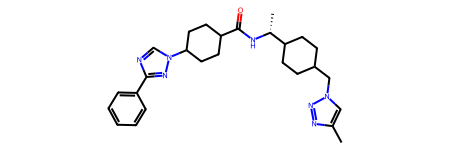

In [6]:
mol

In [7]:
smiles = Chem.MolToSmiles(mol)

In [9]:
Chem.CanonSmiles(smiles)

'Cc1cn(CC2CCC([C@@H](C)NC(=O)C3CCC(n4cnc(-c5ccccc5)n4)CC3)CC2)nn1'

# Special Case cause of RDKit dependency : Assignation of chirality can fail

In [10]:
sampled = ['C', '<12R>', 'O=C1NCCCc2cccc(c2)CCCOCc2cccc1c2', '<20R>', '<16>', '(', 'C', ')', '<11R>', '(', '<6>', 'c1ccc2c(c1)CCC21CCNCC1', ')', '<22S>', '(', 'O', ')', 'O', 'C']

In [11]:
DiG = Sequence2GoF(sampled)

In [12]:
mol = GoF2Mol(DiG, strict_chirality=True)

In [14]:
smiles = Chem.MolToSmiles(mol)

In [15]:
smiles

'CO[c@]1ccc2[c@](O)c1C(=O)NCCCc1cccc([c@]1C1CC3(CCNCC3)c3ccccc31)[C@H](C)CCOC2C'

aromatic atoms (and sometimes general sp2 carbon atoms) show wrong chirality

In [16]:
canonical_smiles = Chem.CanonSmiles(smiles)

In [17]:
canonical_smiles

'COc1ccc2c(O)c1C(=O)NCCCc1cccc(c1C1CC3(CCNCC3)c3ccccc31)[C@H](C)CCOC2C'

Correct chirality assegnation is given only after canonization. This is why last check should be done by canonizazion<br>
Pre canonization count of chiral atoms != post canonizazion count